# Vehicle Loan Prediction

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
train_data = pd.read_csv('train.csv', header=0)
test_data = pd.read_csv('test.csv', header=0)

In [4]:
train_data.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
train_data.shape

(233154, 41)

In [6]:
train_data.describe(include='all')

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,225493,233154,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154,233154,233154.000000,233154.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,294,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-1988,Self employed,31-10-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0yrs 0mon,0yrs 0mon,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,127635,8826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119373,119127,NaN,NaN
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,NaN,NaN,NaN,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,NaN,NaN,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,NaN,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,NaN,NaN,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,NaN,NaN,NaN,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,NaN,NaN,NaN,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,NaN,NaN,NaN,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+

### Exploratory analysis

In [7]:
data_dictionary = pd.read_excel('data_dictionary.xlsx', header = 0)

In [8]:
data_dictionary.head()

,Variable Name,Description,Extra description
0,UniqueID,Identifier for customers,nothing
1,loan_default,Payment default in the first EMI on due date,nothing
2,disbursed_amount,Amount of Loan disbursed,nothing
3,asset_cost,Cost of the Asset,nothing
4,ltv,Loan to Value of the asset,nothing


In [9]:
# Checking whether any specific branch_id is making the difference 
print(list(set(train_data['BRANCH_ID'])))

[1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 29, 34, 35, 36, 42, 43, 48, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 76, 77, 78, 79, 82, 84, 85, 97, 100, 101, 103, 104, 105, 111, 117, 120, 121, 130, 135, 136, 138, 142, 146, 147, 152, 153, 158, 159, 160, 162, 165, 202, 207, 217, 248, 249, 250, 251, 254, 255, 257, 258, 259, 260, 261]


In [10]:
train_data.iloc[:, [4,40]]

,BRANCH_ID,LOAN_DEFAULT
0,67,0
1,67,1
2,67,0
3,67,1
4,67,1
...,...,...
233149,34,0
233150,34,0
233151,77,0
233152,77,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002878A464CA0>]],
      dtype=object)

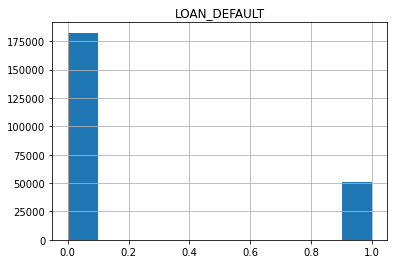

In [11]:
train_data.iloc[:, [40]].hist()

In [12]:
print(train_data['EMPLOYEE_CODE_ID'].value_counts())

2546    628
620     502
255     494
130     408
2153    401
       ... 
241       1
3330      1
3793      1
3779      1
3746      1
Name: EMPLOYEE_CODE_ID, Length: 3270, dtype: int64


In [13]:
train_data['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [14]:
train_data.iloc[:, [8, 9, 20,40]]

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE_DESCRIPTION,LOAN_DEFAULT
0,01-01-1984,Salaried,No Bureau History Available,0
1,31-07-1985,Self employed,I-Medium Risk,1
2,24-08-1985,Self employed,No Bureau History Available,0
3,30-12-1993,Self employed,L-Very High Risk,1
4,09-12-1977,Self employed,No Bureau History Available,1
...,...,...,...,...
233149,01-08-1988,Salaried,D-Very Low Risk,0
233150,05-12-1988,Self employed,A-Very Low Risk,0
233151,01-06-1976,Salaried,No Bureau History Available,0
233152,26-03-1994,Salaried,No Bureau History Available,0


In [15]:
list(set(train_data['EMPLOYMENT_TYPE']))

[nan, 'Self employed', 'Salaried']

In [16]:
a = train_data['EMPLOYMENT_TYPE'].isna().sum()
print(f"Number of empty entries in the dataset: {a}")

Number of empty entries in the dataset: 7661


In [17]:
list(set(train_data[train_data['LOAN_DEFAULT'] == 1]['MANUFACTURER_ID']))

[67, 45, 48, 49, 145, 51, 86, 120, 153]

In [18]:
list(set(train_data[train_data['LOAN_DEFAULT'] == 0]['MANUFACTURER_ID']))
# So, manufacturing id is not a common factor

[67, 45, 48, 49, 145, 51, 86, 120, 153, 156, 152]

In [19]:
# train_data = train_data.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)
# test_data = test_data.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

### Univariate analysis

In [20]:
train_data['UNIQUEID'].nunique()

233154

In [21]:
test_data['UNIQUEID'].nunique()

112392

In [22]:
len(set(test_data['UNIQUEID'].unique()).intersection(set(train_data['UNIQUEID'].unique())))

0

So, uniqueId is not repeating any where

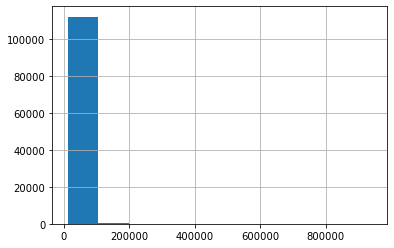

In [23]:
test_data['DISBURSED_AMOUNT'].hist()

### Feature Engineering (Imputing, Handling outliers, One-Hot Encoding)

#### Imputing

In [24]:
# Missing values
print(f"Any missing values present in training data: {train_data.isnull().values.any()}")
print(list(train_data.isnull().sum()))

Any missing values present in training data: True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7661, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


So, we have missing data in Employment type

We can use imputing and replace the empty employment type to self employed

In [25]:
train_data['EMPLOYMENT_TYPE'].fillna('Un employed', inplace=True)
test_data['EMPLOYMENT_TYPE'].fillna('Un employed', inplace=True)

In [26]:
print(f"Any missing values present in training data: {train_data.isnull().values.any()}")
list(set(train_data['EMPLOYMENT_TYPE']))

Any missing values present in training data: False


['Self employed', 'Un employed', 'Salaried']

In [27]:
train_data['EMPLOYMENT_TYPE'] = train_data['EMPLOYMENT_TYPE'].replace(('Self employed', 'Salaried', 'Un employed'), (0, 1, 2))
test_data['EMPLOYMENT_TYPE'] = test_data['EMPLOYMENT_TYPE'].replace(('Self employed', 'Salaried', 'Un employed'), (0, 1, 2))

In [28]:
list(set(train_data['EMPLOYMENT_TYPE']))

[0, 1, 2]

#### Data Cleaning (DATE_OF_BIRTH, AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH)

So, removing age outliers doesn't make sense here as there is no pattern

In [29]:
train_data['EMPLOYMENT_TYPE'].value_counts()

0    127635
1     97858
2      7661
Name: EMPLOYMENT_TYPE, dtype: int64

In [30]:
train_data['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [31]:
def calculate_age(dob):
    year = int(dob.split('-')[2])
    return (pd.to_datetime('today').year - year)

# calculate_age('01-01-1918')

def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year * 12 + month

In [32]:
def data_cleaning_and_transformation(data_set):
    # Changing date of birth to age
    print("Transforming the date of birth atrribute")
    data_set['AGE'] = data_set['DATE_OF_BIRTH'].apply(calculate_age)
    del data_set['DATE_OF_BIRTH']
#     data_set = data_set.drop(['DATE_OF_BIRTH'])
    
    # Converting everything into one unit i.e months
    print("Transforming the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH atrribute")
    data_set['AVERAGE_ACCT_AGE'] = data_set['AVERAGE_ACCT_AGE'].apply(change_col_month)
    data_set['CREDIT_HISTORY_LENGTH'] = data_set['CREDIT_HISTORY_LENGTH'].apply(change_col_month)
    
    
    # Converting categorical column to nominal attribute
    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                     'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 
                                     'Not Scored: More than 50 active Accounts found'),(0, 0, 0, 0, 0, 0, 0))

    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('L-Very High Risk', 'M-Very High Risk'), (1, 1))

    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

    data_set['PERFORM_CNS_SCORE_DESCRIPTION'] = data_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                          'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))

In [33]:
data_cleaning_and_transformation(train_data)
data_cleaning_and_transformation(test_data)

Transforming the date of birth atrribute
Transforming the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH atrribute
Transforming the date of birth atrribute
Transforming the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH atrribute


In [34]:
train_data['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

#### Feature Reduction

In [35]:
train_data=train_data.drop(['UNIQUEID', 'BRANCH_ID','SUPPLIER_ID', 'DISBURSAL_DATE', 'CURRENT_PINCODE_ID','STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG'],axis=1)
test_data=test_data.drop(['UNIQUEID', 'BRANCH_ID','SUPPLIER_ID', 'DISBURSAL_DATE', 'CURRENT_PINCODE_ID','STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG'],axis=1)

,AGE,LOAN_DEFAULT
169,64,0
193,61,0
201,66,0
243,62,0
263,64,0
...,...,...
232465,63,0
232498,61,1
232510,60,1
232576,64,0


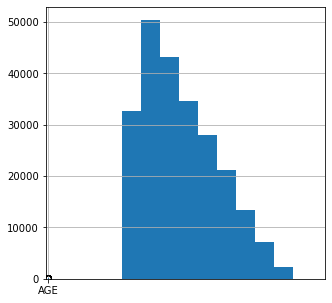

In [36]:
train_data['AGE'].hist(figsize=(5, 5))
train_data.boxplot(column=['AGE'])
train_data.keys()
train_data.loc[train_data['AGE'] >= 60, ['AGE', 'LOAN_DEFAULT']]

In [37]:
train_data

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE
0,50578,58400,89.55,45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37
1,47145,65550,73.23,45,0,1,0,0,0,0,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,36
2,53278,61360,89.63,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,57513,66113,88.48,45,0,1,0,0,0,0,305,1,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,28
4,52378,60300,88.39,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,48,1,0,0,1,0,0,735,5,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,33
233150,73651,100600,74.95,51,0,0,0,1,0,0,825,5,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,33
233151,33484,71212,48.45,86,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45
233152,34259,73286,49.10,86,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
